# Calculate initial WSU data properties

The goal of this notebook is to calculate the properties of the initial WSU data based on the original data base with Early and Later WSU.

Record of changes:
* Original code (8/16/2024)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, QTable
import astropy.units as u
import pandas as pd
import pickle
from importlib import reload
import wsu_plots
import wsu_db
import re

## Read in data files

In [2]:
result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle7_20231212_without_band3_nbin3_npol4.ecsv')
result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle8_20231212_without_band3_nbin3_npol4.ecsv')

In [3]:
len(result_c7_mous)

2712

In [4]:
len(result_c8_mous)

2480

In [5]:
wsu_all = vstack([result_c7_mous,result_c8_mous])

In [6]:
len(wsu_all)

5192

In [7]:
wsu_all['weights_all'] = wsu_all['time_tot']/np.sum(wsu_all['time_tot'])

In [8]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

In [9]:
np.median(wsu_all['wsu_visrate_early_stepped2_typical'])

<Quantity 25.0116375 Gvis / h>

In [10]:
np.average(wsu_all['blc_visrate_typical'],weights=wsu_all['weights_all'])*1e3

<Quantity 9408.88784384 Gvis / h>

In [11]:
np.average(wsu_all['blc_visrate_typical'],weights=wsu_all['weights_all'])/0.001

<Quantity 9408.88784384 Gvis / h>

In [12]:
np.average(wsu_all['wsu_sysperf_early_stepped2_typical_aprojonly'],weights=wsu_all['weights_all'])

<Quantity 0.09329012>

In [13]:
np.max(wsu_all['wsu_sysperf_early_stepped2_typical_aprojonly'])

3.7398558897699994

In [14]:
np.average(wsu_all['blc_sysperf_typical_aprojonly'],weights=wsu_all['weights_all'])/0.001

<Quantity 3.35394744>

In [15]:
np.max(wsu_all['blc_sysperf_typical_aprojonly'])/0.001

73.85688502857141

## calculating the initial WSU properties

In [16]:
reload(wsu_db)
wsu_all_initial_goal = wsu_db.create_initial_wsu_db(wsu_all)

In [17]:
wsu_all_initial_goal.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

In [18]:
reload(wsu_db)
wsu_all_initial_goal_wprop = wsu_db.add_initial_wsu_properties(wsu_all_initial_goal)

In [19]:
wsu_all_initial_goal_wprop.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

Text(0, 0.5, 'channel average')

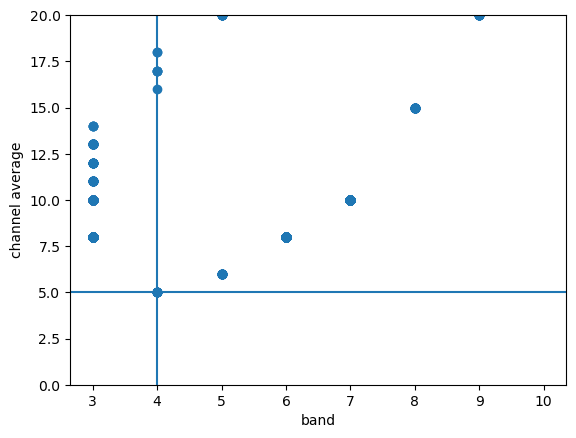

In [20]:
plt.scatter(wsu_all_initial_goal_wprop['band'],wsu_all_initial_goal_wprop['wsu_chanavg_stepped2_initial'])
plt.ylim(0,20)
plt.axhline(5) #chan_avg=5
plt.axvline(4) #band 4
plt.xlabel('band')
plt.ylabel('channel average')

Text(0, 0.5, 'channel average')

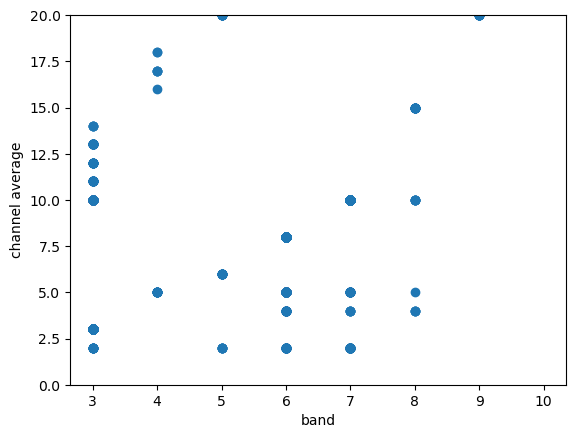

In [24]:
plt.scatter(wsu_all_initial_goal_wprop['band'],wsu_all_initial_goal_wprop['wsu_chanavg_stepped2'])
plt.ylim(0,20)
plt.xlabel('band')
plt.ylabel('channel average')

Text(0, 0.5, 'BW (initial)')

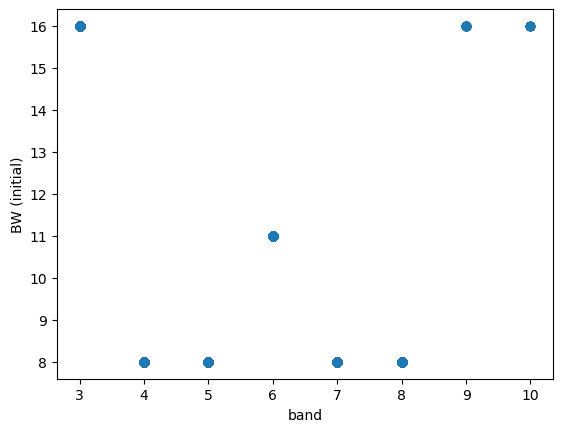

In [21]:
plt.scatter(wsu_all_initial_goal_wprop['band'],wsu_all_initial_goal_wprop['wsu_bandwidth_initial'])
plt.xlabel('band')
plt.ylabel('BW (initial)')

Text(0, 0.5, 'BW (ms4)')

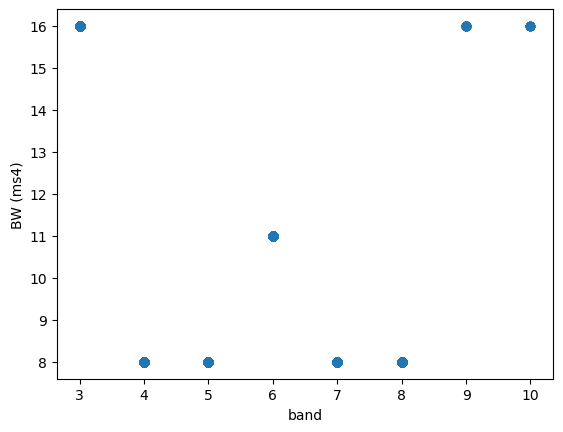

In [22]:
plt.scatter(wsu_all_initial_goal_wprop['band'],wsu_all_initial_goal_wprop['wsu_bandwidth_ms4'])
plt.xlabel('band')
plt.ylabel('BW (ms4)')

Text(0, 0.5, 'BW (goal)')

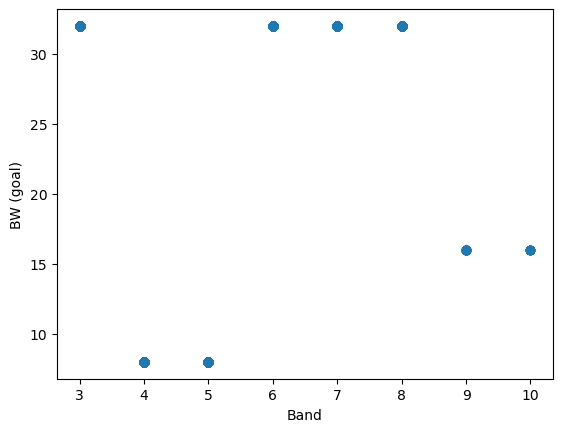

In [25]:
plt.scatter(wsu_all_initial_goal_wprop['band'],wsu_all_initial_goal_wprop['wsu_bandwidth_goal'])
plt.xlabel('Band')
plt.ylabel('BW (goal)')

In [26]:
band_list = [3,4,5,6,7,8,9,10]
for band in band_list:
    idx = wsu_all_initial_goal_wprop['band'] == band
    print(band, np.min(wsu_all_initial_goal_wprop['wsu_chanavg_stepped2_initial'][idx]))

3 8.0
4 5.0
5 6.0
6 8.0
7 10.0
8 15.0
9 20.0
10 32.0


In [27]:
band_list = [3,4,5,6,7,8,9,10]
for band in band_list:
    idx = wsu_all_initial_goal_wprop['band'] == band
    print(band, np.min(wsu_all_initial_goal_wprop['wsu_chanavg_stepped2'][idx]))

3 2.0
4 5.0
5 2.0
6 2.0
7 2.0
8 4.0
9 20.0
10 32.0


In [28]:
idx = (wsu_all_initial_goal_wprop['band'] == 3) & (wsu_all_initial_goal_wprop['wsu_chanavg_stepped2'] <= 2)
wsu_all_initial_goal_wprop[idx]['proposal_id','band','wsu_chanavg_stepped2','wsu_freq','wsu_velres_stepped2','wsu_datarate_early_stepped2_typical']


proposal_id,band,wsu_chanavg_stepped2,wsu_freq,wsu_velres_stepped2,wsu_datarate_early_stepped2_typical
,,,GHz,km / s,Gbyte / s
str14,float64,float64,float64,float64,float64
2019.1.01184.S,3.0,2.0,113.96744014566454,0.071023762187291,1.740739
2019.1.01184.S,3.0,2.0,104.27675175454381,0.07762417058265617,1.740739
2019.1.01184.S,3.0,2.0,113.9807615555354,0.0710154613421856,1.740739
2019.1.01184.S,3.0,2.0,104.28893681642722,0.07761510101735929,1.740739
2021.1.00116.S,3.0,2.0,104.24027490072169,0.07765133364919742,1.740739
2021.1.00116.S,3.0,2.0,113.980769715002,0.07101545625844835,1.740739
2021.1.00116.S,3.0,2.0,104.2261906917967,0.0776618267661305,1.740739
2021.1.00116.S,3.0,2.0,113.96556309277597,0.07102493197362253,1.740739


Okay it looks like what happened here is that these are the ones with velocities slightly less than 0.1 km/s, which we allow but with smaller chanavg as long as it doesn't exceed the data rate.

In [29]:
band_list = [3,4,5,6,7,8,9,10]
for band in band_list:
    idx = wsu_all_initial_goal_wprop['band'] == band
    print(band, np.max(wsu_all_initial_goal_wprop['wsu_datarate_initial_stepped2_initial'][idx]))

3 0.2175865 Gbyte / s
4 0.174070375 Gbyte / s
5 0.145059625 Gbyte / s
6 0.163189875 Gbyte / s
7 0.08703225 Gbyte / s
8 0.0580215 Gbyte / s
9 0.08703225 Gbyte / s
10 0.05439075 Gbyte / s


In [30]:
band_list = [3,4,5,6,7,8,9,10]
for band in band_list:
    idx = wsu_all_initial_goal_wprop['band'] == band
    print(band, np.max(wsu_all_initial_goal_wprop['wsu_datarate_ms4_stepped2_typical'][idx]))

3 1.740739 Gbyte / s
4 0.34814075 Gbyte / s
5 0.8703695 Gbyte / s
6 1.1967580625 Gbyte / s
7 0.8703695 Gbyte / s
8 0.43518475 Gbyte / s
9 0.1740645 Gbyte / s
10 0.1087815 Gbyte / s


In [31]:
band_list = [3,4,5,6,7,8,9,10]
for band in band_list:
    idx = wsu_all_initial_goal_wprop['band'] == band
    print(band, np.max(wsu_all_initial_goal_wprop['wsu_datarate_goal_stepped2_typical'][idx]))

3 3.481478 Gbyte / s
4 0.34814075 Gbyte / s
5 0.8703695 Gbyte / s
6 3.481478 Gbyte / s
7 3.481478 Gbyte / s
8 1.740739 Gbyte / s
9 0.1740645 Gbyte / s
10 0.1087815 Gbyte / s


In [32]:
idx = wsu_all_initial_goal_wprop['array'] == '12m'
np.max(wsu_all_initial_goal_wprop['nant_initial'][idx])

47.0

In [37]:
np.min(wsu_all_initial_goal_wprop['wsu_tint_initial'])

<Quantity 6.144 s>

## save data base

In [38]:
#wsu_all_initial_goal_wprop.write('data/wsu_datarates_mit_per_mous_initial_goal_20240828.ecsv',overwrite=True)
#wsu_all_initial_goal_wprop.write('data/wsu_datarates_mit_per_mous_initial_goal_20250227.ecsv',overwrite=True)
wsu_all_initial_goal_wprop.write('data/wsu_datarates_mit_per_mous_initial_goal_20250423.ecsv',overwrite=True)

## add in band 1 and 2 estimates

This is relevant to initial and goal wsu. also needed to get the mechanism in for the statistics tables.

In [39]:
## original value in data/sample_initial_goal
reload(wsu_db)
wsu_db.generate_db_realizations(wsu_all_initial_goal_wprop, outDir='data/sample_initial_goal_v2',
                                filename='wsu_datarates_mit_per_mous_band12_20231212_initial_goal',
                                frac_12m=0.1, frac_7m=0.06, n=10,add_initial=True,add_goal=True,add_ms4=True)

-------------
data/sample_initial_goal_v2/wsu_datarates_mit_per_mous_band12_20231212_initial_goal_000.ecsv
---
Total number of MOUSes: 5192
Total number of MOUSes meeting the criteria: 2818
Number of MOUSes removed: 336
New number of MOUSes: 4856


Total time: 5206.931093333333 h
Time to be replaced: 520.6931093333333 h
Time replaced: 521.5475999999998 h
---
---
Total number of MOUSes: 4856
Total number of MOUSes meeting the criteria: 1493
Number of MOUSes removed: 106
New number of MOUSes: 4750


Total time: 3953.507506666667 h
Time to be replaced: 237.2104504 h
Time replaced: 237.52008000000004 h
---
-------------
data/sample_initial_goal_v2/wsu_datarates_mit_per_mous_band12_20231212_initial_goal_001.ecsv
---
Total number of MOUSes: 5192
Total number of MOUSes meeting the criteria: 2818
Number of MOUSes removed: 332
New number of MOUSes: 4860


Total time: 5206.931093333333 h
Time to be replaced: 520.6931093333333 h
Time replaced: 521.9452000000001 h
---
---
Total number of MOUSes: 4

In [41]:
test3 = QTable.read('data/sample_initial_goal_v2/wsu_datarates_mit_per_mous_band12_20231212_initial_goal_000.ecsv')

In [42]:
test3.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

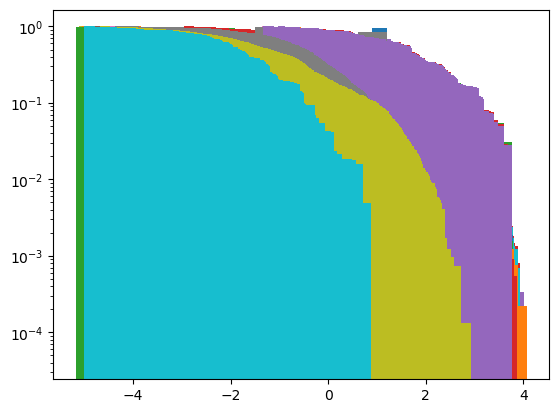

In [43]:
reload(wsu_db)
myresults = wsu_db.calculate_dist(outDir='data/sample_initial_goal_v2',
                                  filename='wsu_datarates_mit_per_mous_band12_20231212_initial_goal',
                                   nbins=500,
                                    quantity_list = ['wsu_nspw_initial','wsu_nspw_early','wsu_nspw_goal','wsu_nspw_later_4x',
                                                     'wsu_cubesize_initial_stepped2','wsu_cubesize_stepped2',    
                                    'wsu_productsize_initial_stepped2',                                  
                                    'wsu_datarate_initial_stepped2_initial', 
                                    'wsu_visrate_initial_stepped2_initial',                                  
                                    'wsu_datavol_initial_stepped2_initial_target_tot',
                                    'wsu_datavol_initial_stepped2_initial_cal',
                                    'wsu_datavol_initial_stepped2_initial_total',
                                    'wsu_productsize_early_stepped2',                                  
                                    'wsu_datarate_early_stepped2_typical', # typical number of antennas
                                    'wsu_visrate_early_stepped2_typical',                                  
                                    'wsu_datavol_early_stepped2_typical_target_tot',
                                    'wsu_datavol_early_stepped2_typical_cal',
                                    'wsu_datavol_early_stepped2_typical_total',
                                      'wsu_datarate_ms4_stepped2_typical', # typical number of antennas
                                    'wsu_visrate_ms4_stepped2_typical',                                  
                                    'wsu_datavol_ms4_stepped2_typical_target_tot',
                                    'wsu_datavol_ms4_stepped2_typical_cal',
                                    'wsu_datavol_ms4_stepped2_typical_total',
                                    'wsu_productsize_ms4_stepped2',                     
                                    'wsu_datarate_goal_stepped2_typical', # typical number of antennas
                                    'wsu_visrate_goal_stepped2_typical',                                  
                                    'wsu_datavol_goal_stepped2_typical_target_tot',
                                    'wsu_datavol_goal_stepped2_typical_cal',
                                    'wsu_datavol_goal_stepped2_typical_total',
                                    'wsu_productsize_goal_stepped2',                                  
                                    'wsu_datarate_later_4x_stepped2_typical',
                                    'wsu_visrate_later_4x_stepped2_typical',                                  
                                    'wsu_datavol_later_4x_stepped2_typical_target_tot',
                                    'wsu_datavol_later_4x_stepped2_typical_cal',
                                    'wsu_datavol_later_4x_stepped2_typical_total',
                                    'wsu_productsize_later_4x_stepped2',                                  
                                    'blc_sysperf_typical_allgrid',
                                    'wsu_sysperf_early_stepped2_typical_allgrid',
                                    'wsu_sysperf_later_2x_stepped2_typical_allgrid',
                                    'wsu_sysperf_later_4x_stepped2_typical_allgrid',
                                    'blc_sysperf_typical_aprojonly',
                                    'wsu_sysperf_early_stepped2_typical_aprojonly',
                                    'wsu_sysperf_later_2x_stepped2_typical_aprojonly',
                                    'wsu_sysperf_later_4x_stepped2_typical_aprojonly',
                                    'wsu_sysperf_goal_stepped2_typical_aprojonly',
                                    'wsu_sysperf_ms4_stepped2_typical_aprojonly',
                                    'wsu_sysperf_initial_stepped2_initial_aprojonly'])

In [44]:
# save results
import os
pickle.dump(myresults,open(os.path.join('data/sample_initial_goal_v2',
                                        'wsu_datarates_mit_per_mous_band12_20231212_initial_goal_agg.pkl'),'wb'))

In [45]:
reload(wsu_db)
mystats = wsu_db.calc_wsu_stats_allsamples(outDir='data/sample_initial_goal_v2',
                                           filename='wsu_datarates_mit_per_mous_band12_20231212_initial_goal',
                                            quantity_list=['blc_nspw',
                                               'blc_cubesize',
                                               'blc_productsize',
                                               'blc_datarate_typical',
                                               'blc_visrate_typical',
                                               'blc_datavol_typical_target_tot',
                                               'blc_datavol_typical_cal',
                                               'blc_datavol_typical_total',  
                                               'wsu_nchan_agg_stepped2_initial',
                                               'wsu_nchan_agg_stepped2_early',
                                               'wsu_nchan_agg_stepped2_ms4',
                                               'wsu_nchan_agg_stepped2_goal',
                                               'wsu_nchan_agg_stepped2_later_4x',
                                               'wsu_nspw_initial','wsu_nspw_early','wsu_nspw_ms4',
                                               'wsu_nspw_goal','wsu_nspw_later_4x',
                                               'wsu_cubesize_initial_stepped2',
                                               'wsu_cubesize_stepped2',
                                               'wsu_productsize_initial_stepped2',                                  
                                               'wsu_datarate_initial_stepped2_initial', # typical number of antennas
                                               'wsu_visrate_initial_stepped2_initial',                                  
                                               'wsu_datavol_initial_stepped2_initial_target_tot',
                                               'wsu_datavol_initial_stepped2_initial_cal',
                                               'wsu_datavol_initial_stepped2_initial_total',
                                               'wsu_productsize_early_stepped2',                                  
                                               'wsu_datarate_early_stepped2_typical', # typical number of antennas
                                               'wsu_visrate_early_stepped2_typical',                                  
                                               'wsu_datavol_early_stepped2_typical_target_tot',
                                               'wsu_datavol_early_stepped2_typical_cal',
                                               'wsu_datavol_early_stepped2_typical_total',
                                               'wsu_productsize_ms4_stepped2',                                  
                                               'wsu_datarate_ms4_stepped2_typical',
                                               'wsu_visrate_ms4_stepped2_typical',
                                               'wsu_datavol_ms4_stepped2_typical_target_tot',
                                               'wsu_datavol_ms4_stepped2_typical_cal',
                                               'wsu_datavol_ms4_stepped2_typical_total',
                                               'wsu_productsize_goal_stepped2',                                  
                                               'wsu_datarate_goal_stepped2_typical',
                                               'wsu_visrate_goal_stepped2_typical',
                                               'wsu_datavol_goal_stepped2_typical_target_tot',
                                               'wsu_datavol_goal_stepped2_typical_cal',
                                               'wsu_datavol_goal_stepped2_typical_total',
                                               'wsu_productsize_later_4x_stepped2',                                  
                                               'wsu_datarate_later_4x_stepped2_typical',
                                               'wsu_visrate_later_4x_stepped2_typical',
                                               'wsu_datavol_later_4x_stepped2_typical_target_tot',
                                               'wsu_datavol_later_4x_stepped2_typical_cal',
                                               'wsu_datavol_later_4x_stepped2_typical_total',
                                               'wsu_productsize_later_4x_stepped2',                                  
                                               'blc_sysperf_typical_aprojonly',
                                               'wsu_sysperf_initial_stepped2_initial_aprojonly',
                                               'wsu_sysperf_early_stepped2_typical_aprojonly',
                                               'wsu_sysperf_ms4_stepped2_typical_aprojonly',
                                               'wsu_sysperf_goal_stepped2_typical_aprojonly',
                                               'wsu_sysperf_later_4x_stepped2_typical_aprojonly'])

/Users/akepley/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [46]:
# save results
import os
pickle.dump(mystats,open(os.path.join('data/sample_initial_goal_v2',
                                        'wsu_datarates_mit_per_mous_band12_20231212_initial_goal'+"_stats.pkl"),'wb'))

# Make Tables

In [47]:
reload(wsu_db)
wsu_db.make_wsu_stats_table_newstats_datarate(mystats,add_initial_goal=True,
                                              fileout='tables/wsu_datarate_summary_initial_goal_v2.tex')

In [48]:
reload(wsu_db)
wsu_db.make_wsu_stats_table_newstats_datavol(mystats,add_initial_goal=True,
                                             fileout='tables/wsu_datavol_summary_initial_goal_v2.tex')

In [80]:
reload(wsu_db)
wsu_db.make_wsu_stats_table_newstats_sysperf(mystats,
                                             add_initial_goal=True,
                                             fileout='tables/wsu_sysperf_summary_initial_goal_v2.tex')

## plots

In [50]:
wsu_all_initial_goal_wprop = QTable.read('data/wsu_datarates_mit_per_mous_initial_goal_20250227.ecsv')

In [51]:
band1_band2_agg = pickle.load(open('data/sample_initial_goal_v2/wsu_datarates_mit_per_mous_band12_20231212_initial_goal_agg.pkl','rb'))

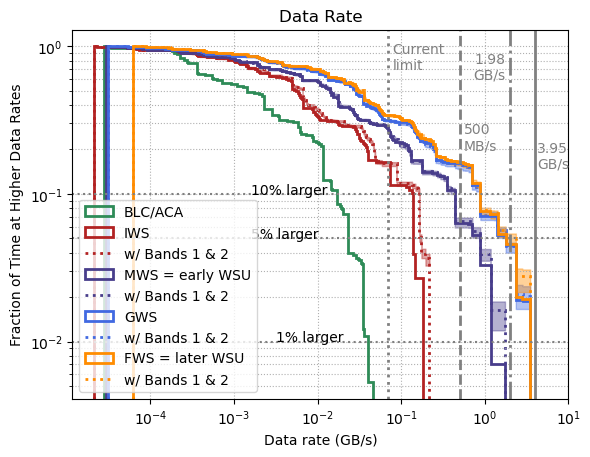

In [52]:
reload(wsu_plots)
wsu_plots.plot_datarate_comparison(wsu_all_initial_goal_wprop,
                                  add_initial=True,
                                  add_goal=True, 
                                  old_labels=False, 
                                  add_tech_limits=True,
                                  band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                  figname='plots_update/datarate_distribution_initial_goal.png')

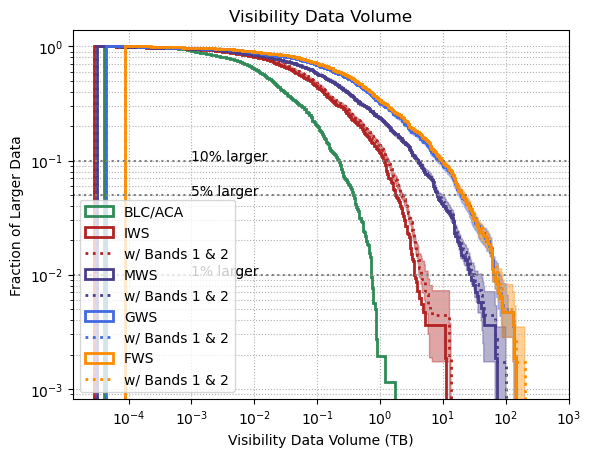

In [53]:
reload(wsu_plots)
wsu_plots.plot_datavol_comparison(wsu_all_initial_goal_wprop,datatype='total',
                                  plot_title='Visibility Data Volume',
                                  add_initial=True,add_goal=True, old_labels=False,
                                   band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                   figname='plots_update/datavol_distribution_initial_goal.png')

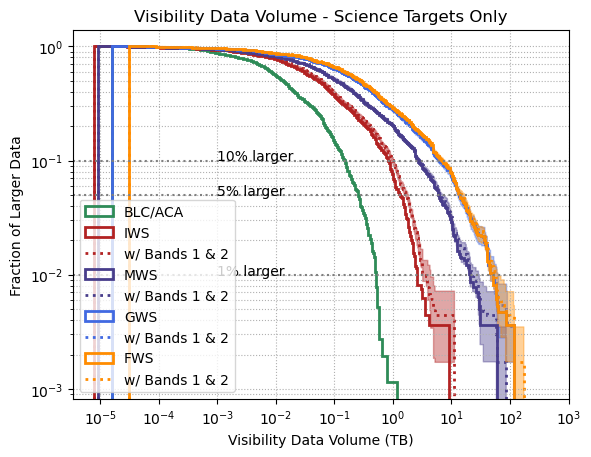

In [54]:
reload(wsu_plots)
wsu_plots.plot_datavol_comparison(wsu_all_initial_goal_wprop,datatype='target_tot',
                                  plot_title='Visibility Data Volume - Science Targets Only',
                                  add_initial=True,add_goal=True, old_labels=False,
                                 band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                 figname='plots_update/datavol_distribution_target_tot_initial_goal.png')

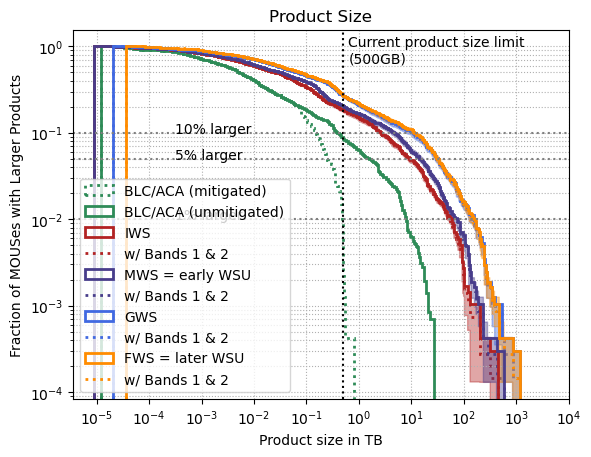

In [55]:
reload(wsu_plots)
wsu_plots.plot_productsize_comparison(wsu_all_initial_goal_wprop,
                                  plot_title='Product Size',
                                  add_initial=True,add_goal=True, old_labels=False,
                                     band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                     figname='plots_update/productsize_distribution.png')

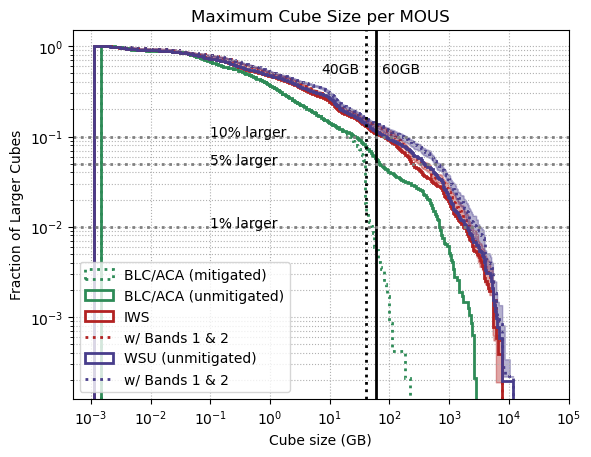

In [56]:
reload(wsu_plots)
wsu_plots.plot_cubesize_comparison(wsu_all_initial_goal_wprop, plot_title="Maximum Cube Size per MOUS",add_initial=True,
                                  band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                  figname='plots_update/cubesize_distribution_initial_goal.png')

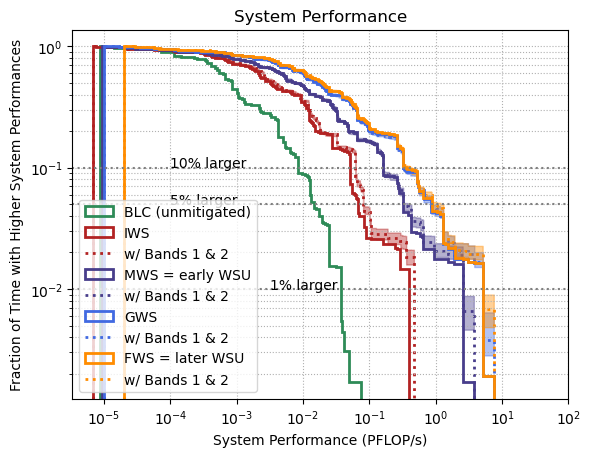

In [57]:
reload(wsu_plots)
wsu_plots.plot_soc_result_cumulative(wsu_all_initial_goal_wprop,
                                     plot_title='System Performance',label='aprojonly',
                                     add_initial=True,add_goal=True, old_labels=False,
                                        band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                    pltname='plots_update/sysperf_distribution_aprojonly_initial_goal.png')

In [62]:
wsu_all_initial_goal_wprop.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

maximum ratio
1458.8762343485084
median ratio
3.396499987152109


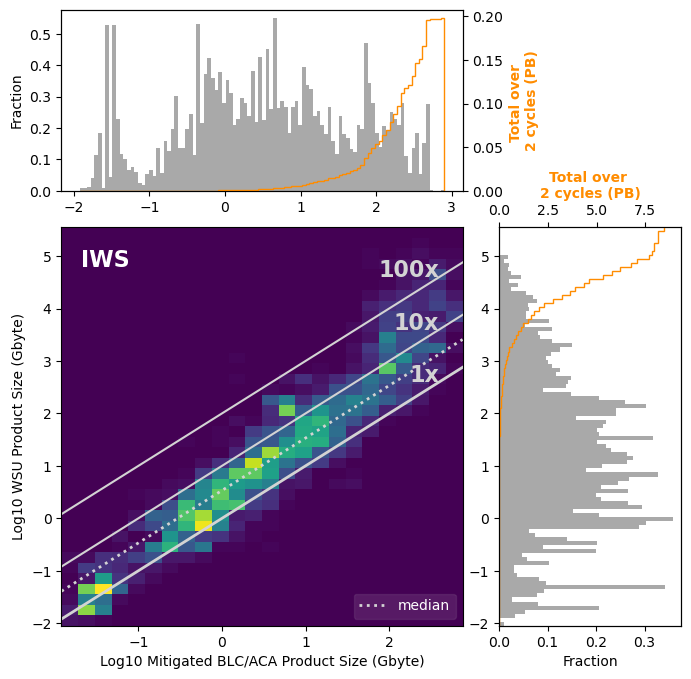

In [63]:
reload(wsu_plots)
wsu_plots.productsize_comparison_hist_plot(wsu_all_initial_goal_wprop,stage='initial',plot_title = 'IWS',
                                  pltname='plots_update/productsize_comparison_initial.png')

maximum ratio
3890.3366249293563
median ratio
8.235858164411841


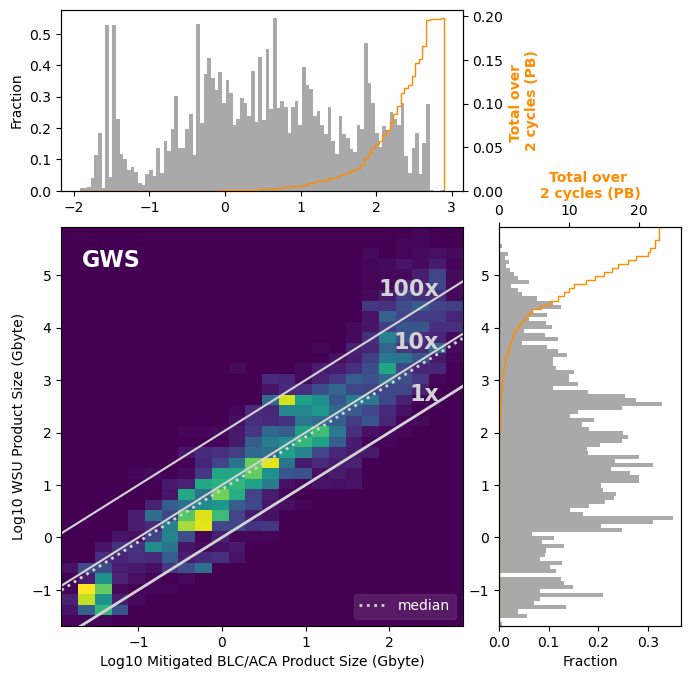

In [64]:
reload(wsu_plots)
wsu_plots.productsize_comparison_hist_plot(wsu_all_initial_goal_wprop,stage='goal',plot_title = 'GWS',
                                          pltname='plots_update/productsize_comparison_goal.png')

Median Ratio
3.39583740234375
Max Ratio
61.50018977732793


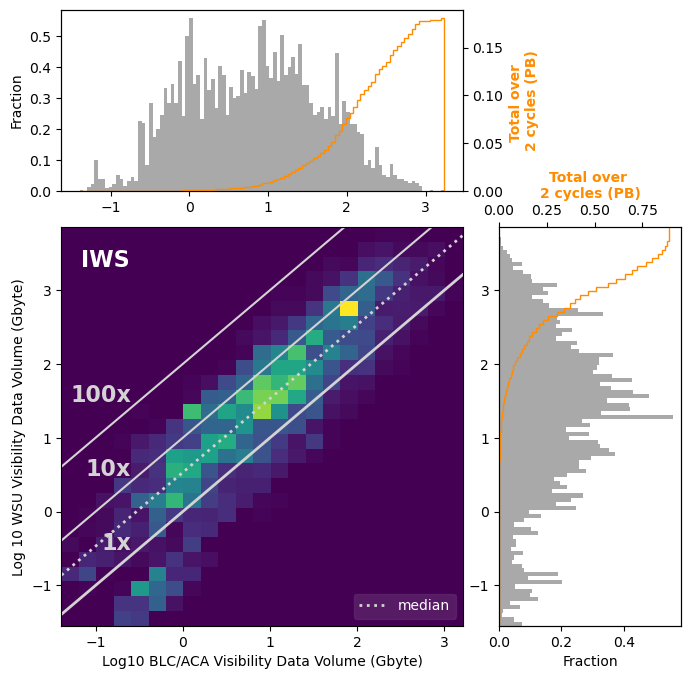

In [65]:
reload(wsu_plots)
wsu_plots.visibility_size_comparison_hist_plot(wsu_all_initial_goal_wprop,stage='initial',plot_title = 'IWS',
                                                  pltname='plots_update/datavol_comparison_initial.png')

Median Ratio
16.513603940217394
Max Ratio
694.40625


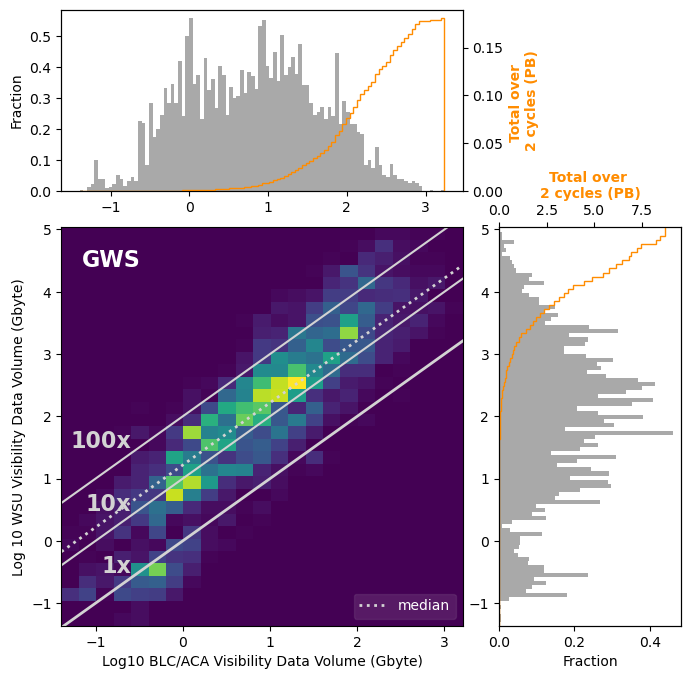

In [66]:
reload(wsu_plots)
wsu_plots.visibility_size_comparison_hist_plot(wsu_all_initial_goal_wprop,stage='goal',plot_title = 'GWS',
                                              pltname='plots_update/datavol_comparison_goal.png')

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23.]


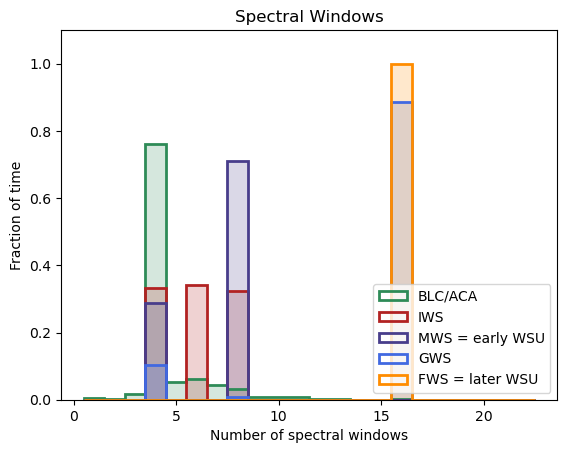

In [67]:
reload(wsu_plots)
wsu_plots.plot_spw_hist_all(wsu_all_initial_goal_wprop,bin_min=1,bin_max=23,nbin=22,
                           title='Spectral Windows',
                           add_initial=True, add_goal=True, old_labels=False,
                           pltname='plots_update/nspw_all_initial_goal.png')

In [68]:
log_imsize_range = (1.6,4.1)
log_imsize_step = 0.1
log_nchan_range = (1.7, 5.9)
log_nchan_step = 0.1

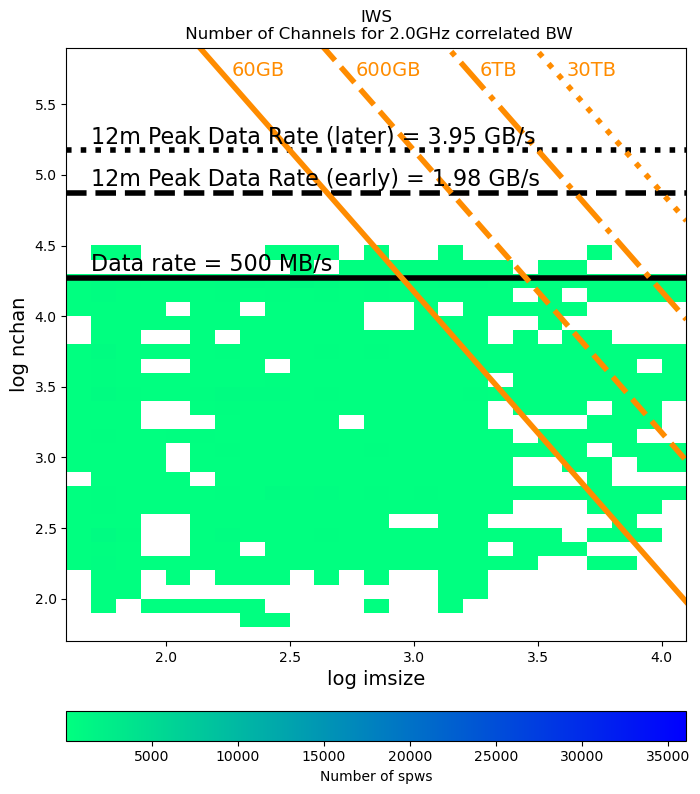

In [69]:
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_initial_goal_wprop, 
                                                                chan_type='wsu_nchan_spw_stepped2_initial',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'IWS\n Number of Channels for 2.0GHz correlated BW',
                                                                cmap='winter_r',vmin=20, vmax=36080.0,
                                                                band2_specscan=True,nspw=8,
                                                                myweights=wsu_all_initial_goal_wprop['wsu_nspw_initial'],
                                                                pltname='plots/density_plot_wsu_spw_initial.png')

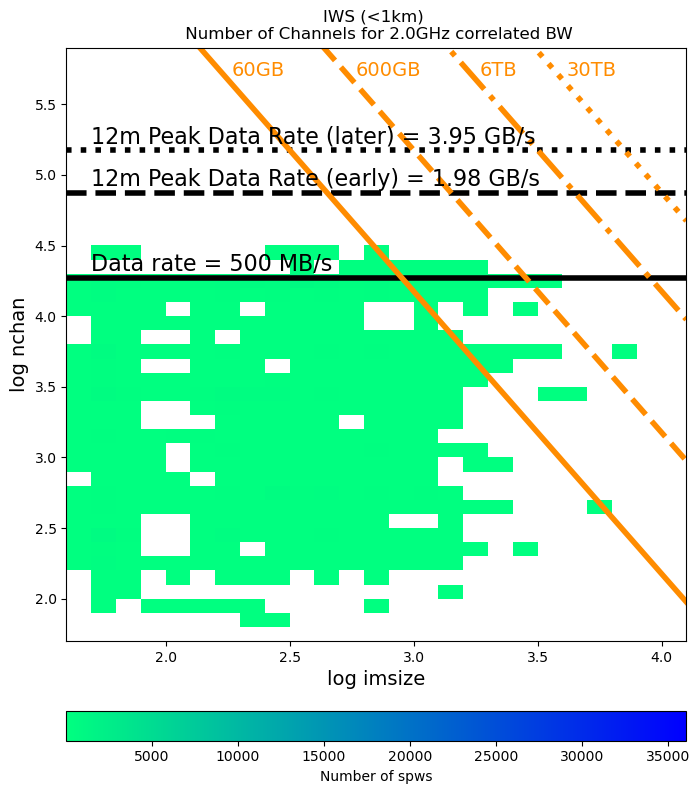

In [70]:
reload(wsu_plots)
idx = wsu_all_initial_goal_wprop['L80'] < 1.0*u.km
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_initial_goal_wprop[idx], 
                                                                chan_type='wsu_nchan_spw_stepped2_initial',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'IWS (<1km) \n Number of Channels for 2.0GHz correlated BW',
                                                                cmap='winter_r',vmin=20, vmax=36080.0,
                                                                band2_specscan=True,nspw=8,
                                                                myweights=wsu_all_initial_goal_wprop[idx]['wsu_nspw_initial'],
                                                                pltname='plots/density_plot_wsu_spw_initial_shortbaselines.png')

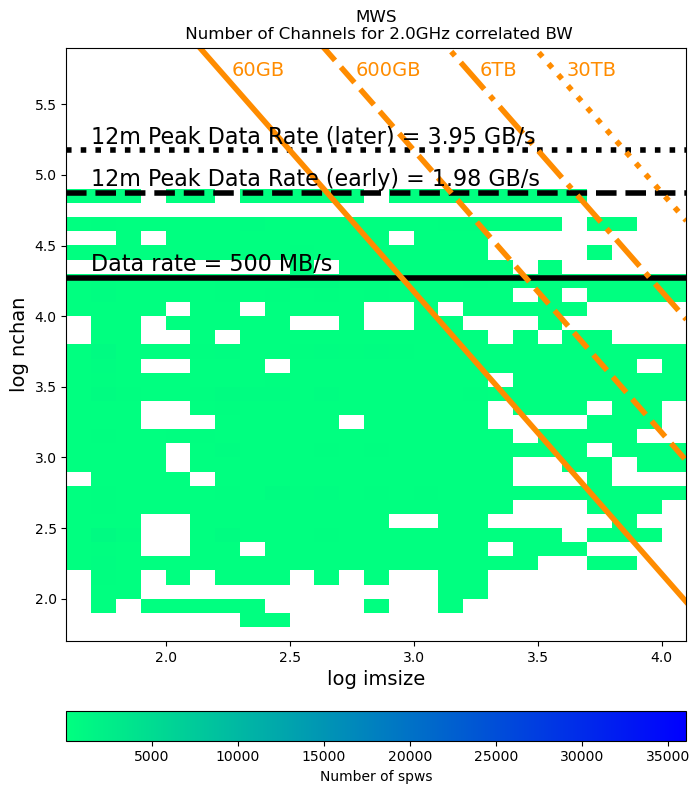

In [71]:
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_initial_goal_wprop, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'MWS\n Number of Channels for 2.0GHz correlated BW',
                                                                cmap='winter_r',vmin=20, vmax=36080.0,
                                                                band2_specscan=True,nspw=8,
                                                                myweights=wsu_all_initial_goal_wprop['wsu_nspw_early'],
                                                                pltname='plots/density_plot_wsu_spw_mws.png')

In [72]:
wsu_all_initial_goal_wprop.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

## Milestone 5 versions of the plots

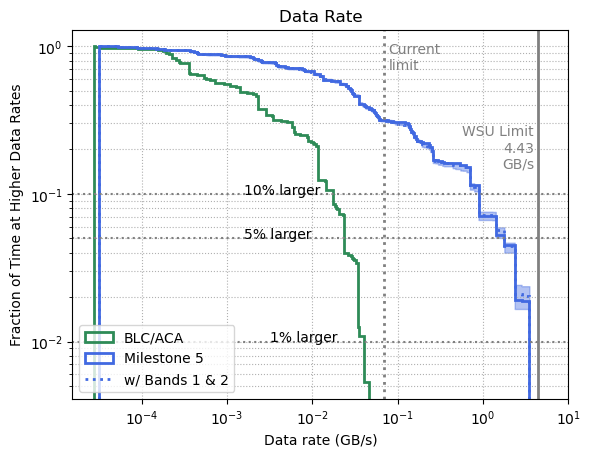

In [73]:
reload(wsu_plots)
wsu_plots.plot_datarate_comparison_sdd(wsu_all_initial_goal_wprop,                            
                                  band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                  figname='plots_update/datarate_distribution_milestone5.png')

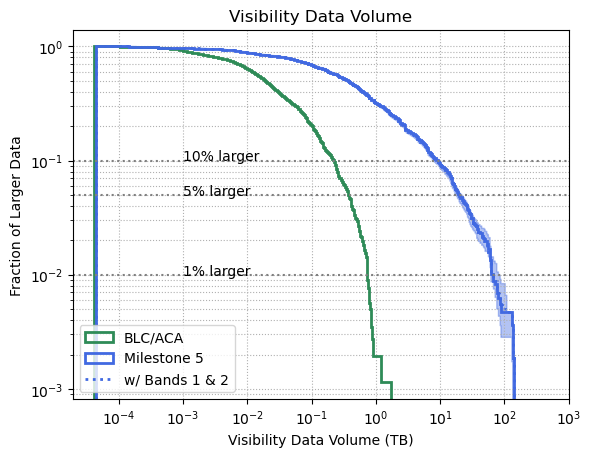

In [74]:
reload(wsu_plots)
wsu_plots.plot_datavol_comparison_sdd(wsu_all_initial_goal_wprop,                            
                                  band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                  figname='plots_update/datavol_distribution_milestone5.png')

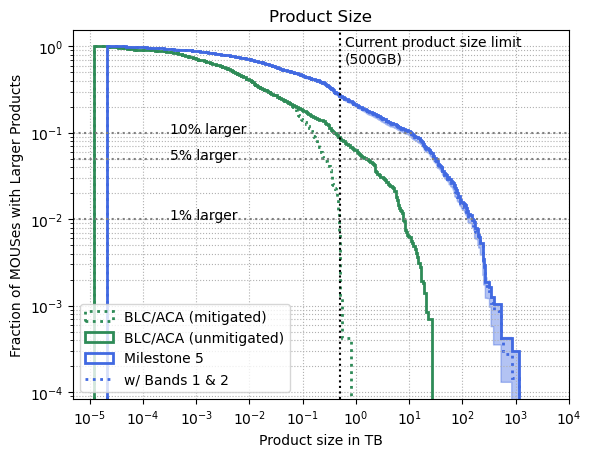

In [75]:
reload(wsu_plots)
wsu_plots.plot_productsize_comparison_sdd(wsu_all_initial_goal_wprop,
                                          band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                          figname='plots_update/productsize_distribution_milestone5.png')

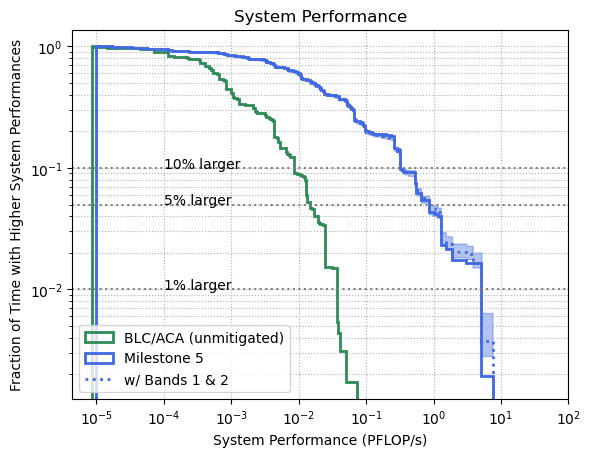

In [76]:
reload(wsu_plots)
wsu_plots.plot_soc_result_cumulative_sdd(wsu_all_initial_goal_wprop,
                                     plot_title='System Performance',label='aprojonly',
                                        band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                    pltname='plots_update/sysperf_distribution_aprojonly_blc_milestone5.png')

In [77]:
reload(wsu_db)
wsu_db.calc_sysperf_average_over_subset(wsu_all_initial_goal_wprop,percentile=90,stage='goal')

Max:  7.479711779539999  PFLOP/s
Percentile:  90
Percentile Value:  0.5127834734899999  PFLOP/s
12m average over percentile:  0.09899675588999221  PFLOPS/s


In [78]:
reload(wsu_db)
wsu_db.calc_sysperf_average_over_subset(wsu_all_initial_goal_wprop,percentile=95,stage='goal')

Max:  7.479711779539999  PFLOP/s
Percentile:  95
Percentile Value:  1.1507248891599997  PFLOP/s
12m average over percentile:  0.13992663642886144  PFLOPS/s


In [79]:
reload(wsu_db)
wsu_db.calc_sysperf_average_over_subset(wsu_all_initial_goal_wprop,percentile=100,stage='goal')

Max:  7.479711779539999  PFLOP/s
Percentile:  100
Percentile Value:  7.479711779539999  PFLOP/s
12m average over percentile:  0.34488181032674997  PFLOPS/s


## What's driving the increase in data rates?

Re-importing the data

In [ ]:
wsu_all_initial_goal_wprop = QTable.read('data/wsu_datarates_mit_per_mous_initial_goal_20250227.ecsv')

In [ ]:
band1_band2_agg = pickle.load(open('data/sample_initial_goal_v2/wsu_datarates_mit_per_mous_band12_20231212_initial_goal_agg.pkl','rb'))

In [ ]:
reload(wsu_plots)

In [ ]:
wsu_plots.plot_category_band_hist2d(wsu_all_initial_goal_wprop,
                                    'blc_nchan_agg','wsu_nchan_agg_stepped2_initial',
                                    stat='average',
                                    title='Average IWS/BLC Aggregate Nchan')

In [ ]:
wsu_plots.plot_category_band_hist2d(wsu_all_initial_goal_wprop,
                                    'blc_productsize','wsu_productsize_initial_stepped2',
                                    stat='max',
                                    title='Max IWS/BLC Product Size Ratio')

In [ ]:
wsu_plots.plot_category_band_hist2d(wsu_all_initial_goal_wprop,
                                    'blc_productsize','wsu_productsize_early_stepped2',
                                    stat='max',
                                    title='Max MWS/BLC Product Size Ratio')

In [ ]:
wsu_plots.plot_category_band_hist2d(wsu_all_initial_goal_wprop,
                                    'wsu_productsize_initial_stepped2','wsu_productsize_early_stepped2',
                                    stat='max',
                                    title='Max MWS/IWS Product Size Ratio')

In [ ]:
wsu_plots.plot_category_band_hist2d(wsu_all_initial_goal_wprop,
                                    'wsu_productsize_early_stepped2','wsu_productsize_goal_stepped2',
                                    stat='max',
                                    title='Max GWS/MWS Product Size Ratio')

In [ ]:
wsu_plots.plot_category_band_hist2d(wsu_all_initial_goal_wprop,
                                    'wsu_productsize_early_stepped2','wsu_productsize_later_4x_stepped2',
                                    stat='max',
                                    title='Max FWS/MWS Product Size Ratio')

In [ ]:
np.sum(wsu_all_initial_goal_wprop['wsu_productsize_initial_stepped2']).to('PB')/2.0

In [ ]:
np.sum(wsu_all_initial_goal_wprop['wsu_productsize_early_stepped2']).to('PB')/2.0

In [ ]:
np.sum(wsu_all_initial_goal_wprop['wsu_productsize_goal_stepped2']).to('PB')/2.0

In [ ]:
np.sum(wsu_all_initial_goal_wprop['wsu_productsize_later_4x_stepped2']).to('PB')/2.0